In [9]:
%%html
<style>
.toc-item > li {
    list-style-type: upper-alpha;
}
</style>

## Kamal Shaham         
## D209: Predictive Analysis 

<div>
    <h2>Table of Contents</h2>
    <ul class="toc-item">
        <li><a href="#question">Research Question</a>
            <ul>
 <li><a href="#goal">Goal of data analysis</a></li>
            </ul>
        </li>
        <li><a href="#justification">Method Justification</a>
            <ul>
                <li><a href="#justification">Justification of prediction method</a></li>
                <li><a href="#assumption">Assumption of prediction method</a></li>
                <li><a href="#packages">Packages used for analysis</a></li>
            </ul>
        </li>
        <li><a href="#cleaning-goal">Data Preparation</a>
        <ul>
                <li><a href="#cleaning-goal">Goal of data preprocessing</a></li>
                <li><a href="#variables">Variables used in analysis</a></li>
                <li><a href="#steps">Steps used in data preparation</a></li>
                <li><a href="#csv">Prepared data CSV</a></li>
            </ul>
        </li>
        <li><a href="#data-analysis">Data Analysis</a>
        <ul>
                <li><a href="#data-analysis">Training and test data sets</a></li>
                <li><a href="#analysis-technique">Analysis technique used</a></li>
                <li><a href="#prediction-code">Analysis code</a></li>
            </ul>
        </li>
        <li><a href="#data-summary">Data Summary and Implications</a>
        <ul>
                <li><a href="#data-summary">Accuracy and area</a></li>
                <li><a href="#results">Results and implications of data analysis</a></li>
                <li><a href="#limitation">Limitation of this analysis</a></li>
                <li><a href="#course-of-action">Recommended course of action</a></li>
            </ul>
        </li>
        <li><a href="#video">Panopto video</a></li>
        <li><a href="#thirdparty">Third-party code references</a></li>
        <li><a href="#references">References</a></li>
    </ul>
</div>

## A. Research Question <a id="question"></a>
According to the medical data dictionary (D209 Datasets), a patient readmitted to the hospital within a month of discharge is categorized as a readmission. This categorization introduces an intriguing research question: Can hospitals predict if a patient is at risk of readmission based on information gathered during their visit? By utilizing patient medical data, we aim to employ a random forest to assist with this analysis.

### A2. Goal of data analysis <a id="goal"></a>
The goal of this data analysis is to develop a machine learning model using a random forest to assist hospitals in identifying individuals at risk of readmission. According to a study by Rocca et al., readmissions pose a significant burden on both patients and healthcare systems, leading to increased mortality and morbidity. By predicting patient readmissions, hospitals can customize care for patients at all readmission risk levels. This approach aims to not only to save on hospital costs but also enhance patient recoveries.

## B. Method Justification <a id="justification"></a>
In a random forest, every individual tree selects random subsets of the training dataset through a technique called bootstrap aggregation. Each tree is then trained on these smaller datasets. When making predictions, the results from each tree are either aggregated by taking the average or by using a majority voting system (How Is Random Forest Used for Classification and Regression Problems?, n.d.). Random forests reduce the overfitting problem of decision trees and help improve the accuracy. It also reduces variances in predictions when compared to a single decision tree (AIML.com, 2023).

### B2. Method assumption<a id="assumption"></a>
Random forest uses bagging which is an ensembling method that attempts to resolve overfitting for classification or regression problems (What Is Bagging? | IBM, n.d.). It assumes that sampling is representative, of which the underlying decision tree shares the same assumption. The tree-based model depends heavily on the training data used to build the model.

### B3. Python packages used <a id="packages"></a>
- Pandas: A standard data science import that makes it easy to read, sort, clean, and prepare data for analysis.
- Numpy: Assists with reading and visualizing data, also provides tools for calculations.
- Matplotlib: Provides easy-to-understand graphs and tools to visualize reports and data points.
- Sklearn: The standard package for using the RandomForestClassifier technique and checking how well it works. Provides methods for training, testing, splitting, and fitting data. Also used to select the most significant features using the SelectKBest function. Used for additional metrics such as accuracy score, classification report, and confusion matrix.

<a id="cleaning-goal"></a>
## C. Data Preparation/Cleaning
One data preprocessing goal will be to remove insignificant features from our dataset. This step is crucial for selecting which features to use for our initial model. We will utilize the SelectKBest function within the sklearn package to include only features with a p-value of 0.05 or below, this is meant to reduce noise in the data.

<a id="variables"></a>
### C2. Variable Statistical Summaries
Geographic variables of the patient, such as population, city, and state, will not be included in our analysis as they do not provide benefits for our purposes. However, there is potential for different modeling techniques to be applied to these columns for further analysis. To identify which features are significant for this analysis, we run the SelectKBest function and only select variables with p-values below 0.05.

The table below includes the independent variables (with 'ReAdmis' as our dependent variable), their data types, their classification as categorical or continuous, and sample data from each column. A summary statistics table is generated, detailing each variable's standard deviation, interquartile ranges, mean, and median (noted as the 50% value in the output). The categorical variables in the data will be converted to numerical types. Histograms and box plots have been generated for variables to check for outliers and distribution.

- ReAdmis: Character (binary categorical), Example: No
- Initial_admin: Character (nominal categorical), Example: Emergency Admission
- Marital: Character (nominal categorical), Example: Divorced
- Services: Character (Nominal categorical), Example: Blood Work
- Initial_days: Numeric, Example: 10.585770
- TotalCharge: Numeric, Example: 3726.702860

<a id="steps"></a>
### C3. Data Preparation Steps

The data will need to be inspected prior to any predictive analysis. We first check for missing and duplicate values in our dataset. Missing values can potentially be filled with zeros or populated with the average of the respective column. Duplicated data is also checked to ensure each row is unique and duplication does not exist. Outliers will be identified using box plots, while the distributions will be represented with histograms. Patient location and job demographics (such as state, city, job, area, etc.) will not be beneficial to our analysis and thus can be removed. Several column names, such as Item1 through Item8, will be renamed for clarity during this analysis. Any categorical variables must be converted to numerical values.

For categorical variables with more than two levels that cannot be sorted ordinally, one-hot encoding will be utilized. Any columns with Yes/No values or Low, Medium, and High will be converted to numerical values. We then identify the features with the most significant p-values by using the SelectKBest function from the sklearn package. This function will return p-values that are less than 0.05, which are the columns we will use for our initial analysis. We then print our summary statistics and newly created column names. Lastly, we scale and standardize our data before running our initial model.

In [10]:
%matplotlib inline

# import our statistical libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# import our initial dataset
data=pd.read_csv('medical_clean.csv')

#view first 5 rows and column information
print(data.head())
print(data.columns)

#check for missing/null values
print(data.isnull().sum())

#check for duplicate values of any rows
print(data.duplicated().any())

# Check for duplicate values based on customer_id unique key
print(data.duplicated('Customer_id').any())

# remove unused columns
data.drop(['CaseOrder', 'Customer_id','Interaction', 'UID', 'City', 'State', 'County', 'TimeZone', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'Job', 'Children'], axis=1, inplace=True)

# view data after columns dropped
print(data.head())
print(data.columns)
print(data.info())

# rename unclear survey response columns
survey_col_names = {
    'Item1': 'Timely_admis',
    'Item2': 'Timely_treat',
    'Item3': 'Timely_visits',
    'Item4': 'Reliability',
    'Item5': 'Options',
    'Item6': 'Hours_treat',
    'Item7': 'Courteous_staff',
    'Item8': 'Active_listening'
}
data = data.rename(columns=survey_col_names)

# Variable statistics to check distributions
print(data.describe(include='all'))

   CaseOrder Customer_id                           Interaction  \
0          1     C412403  8cd49b13-f45a-4b47-a2bd-173ffa932c2f   
1          2     Z919181  d2450b70-0337-4406-bdbb-bc1037f1734c   
2          3     F995323  a2057123-abf5-4a2c-abad-8ffe33512562   
3          4     A879973  1dec528d-eb34-4079-adce-0d7a40e82205   
4          5     C544523  5885f56b-d6da-43a3-8760-83583af94266   

                                UID          City State        County    Zip  \
0  3a83ddb66e2ae73798bdf1d705dc0932           Eva    AL        Morgan  35621   
1  176354c5eef714957d486009feabf195      Marianna    FL       Jackson  32446   
2  e19a0fa00aeda885b8a436757e889bc9   Sioux Falls    SD     Minnehaha  57110   
3  cd17d7b6d152cb6f23957346d11c3f07  New Richland    MN        Waseca  56072   
4  d2f0425877b10ed6bb381f3e2579424a    West Point    VA  King William  23181   

        Lat       Lng  Population      Area          TimeZone  \
0  34.34960 -86.72508        2951  Suburban   America/Chi

In [11]:
# Encoding categorical binary columns as numeric.
bin_cols = ['ReAdmis', 'HighBlood', 'Stroke', 'Arthritis', 'Diabetes', 
            'Anxiety', 'Asthma', 'Soft_drink', 'Overweight', 'Allergic_rhinitis', 'BackPain', 'Hyperlipidemia', 'Reflux_esophagitis']
bin_dict = {'Yes': 1, 'No': 0}
for col in bin_cols:
    data[col] = data[col].replace(bin_dict)

# get categorical columns for dummy variable generation
categorical_cols = ['Marital', 'Gender','Initial_admin','Complication_risk','Services']

# generate dummy variables
data = pd.get_dummies(data, columns=categorical_cols, drop_first=False)

# remove any spaces after dummy variable generation
data.columns = data.columns.str.replace(' ', '')

# inspect dummy variables
print(data.info())
print(data.head())

# display all columns
pd.set_option('display.max_columns', None)
# display all the rows
pd.set_option('display.max_rows', None)

# summary stats and check newly created columns
print(data.describe(include='all'))

X = data.drop(["ReAdmis"],axis=1)
y = data["ReAdmis"]

feature_names = X.columns
# import the selectkbest function from sklearn
from sklearn.feature_selection import SelectKBest, f_classif
#use selectkbest to identify all significant features in the data set
skbest = SelectKBest(score_func = f_classif, k='all')
X_new = skbest.fit_transform(X, y)
X_new.shape

### Finding P-values to select statistically significant features
p_values = pd.DataFrame({'Feature': X.columns, 
                         'p_value':skbest.pvalues_}).sort_values('p_value')
print(p_values)

# only dislay features with p-value < 0.05
features_to_keep = p_values['Feature'][p_values['p_value'] < .05]
# print the name of the selected features
print(features_to_keep)

#variables significant to this analysis
sig_data = data[['ReAdmis', 'TotalCharge', 'Initial_days', 'Services_MRI', 'Services_CTScan', 'Services_BloodWork', 'Services_Intravenous', 'Marital_Divorced', 'Marital_NeverMarried', 'Marital_Separated', 'Marital_Married', 'Marital_Widowed',  'Initial_admin_ObservationAdmission', 'Initial_admin_EmergencyAdmission', 'Initial_admin_ElectiveAdmission', ]]

# display columns used for initial model analysis
print(sig_data.columns)

# display most significant data
print(sig_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 48 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 10000 non-null  int64  
 1   Income                              10000 non-null  float64
 2   ReAdmis                             10000 non-null  int64  
 3   VitD_levels                         10000 non-null  float64
 4   Doc_visits                          10000 non-null  int64  
 5   Full_meals_eaten                    10000 non-null  int64  
 6   vitD_supp                           10000 non-null  int64  
 7   Soft_drink                          10000 non-null  int64  
 8   HighBlood                           10000 non-null  int64  
 9   Stroke                              10000 non-null  int64  
 10  Overweight                          10000 non-null  int64  
 11  Arthritis                           10000 

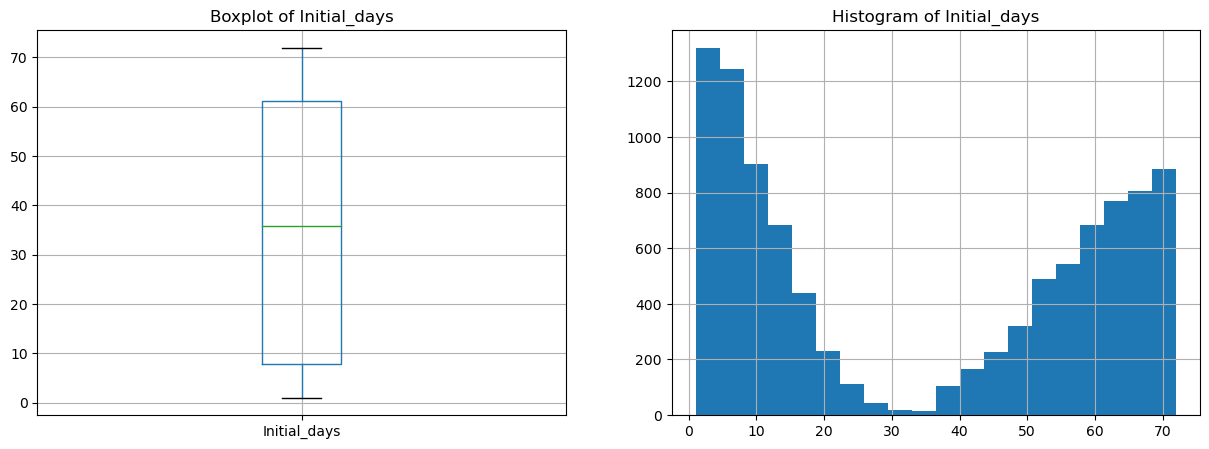

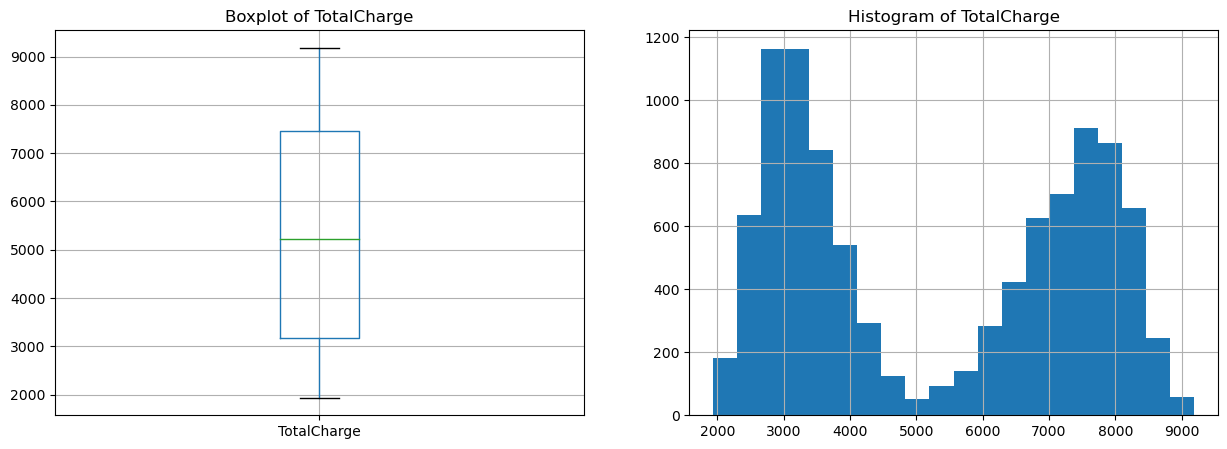

In [17]:
import matplotlib.pyplot as plt

# select numerical columns for outlier and distribution checks
numerical_columns = ["Initial_days", "TotalCharge"]

# loops through the columns and generates a boxplot and histogram for each
for column in numerical_columns:
    # creates subplots
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    
    # boxplot generation
    sig_data.boxplot(column, ax=ax[0])
    ax[0].set_title(f'Boxplot of {column}')
    
    # histogram generation
    sig_data[column].hist(ax=ax[1], bins=20)
    ax[1].set_title(f'Histogram of {column}')
    
    # displays the plots
    plt.show()

In [13]:
from sklearn.preprocessing import StandardScaler

#initialize scaler
scalar = StandardScaler()
#remove dependent variable from features
data_pred = sig_data.drop(['ReAdmis'], axis=1)
#scale and standardize features, fit scaler to data
data_pred_std = pd.DataFrame(scalar.fit_transform(data_pred), columns=data_pred.columns)

#combine dependent variable with scaled independent variables
data_resp = sig_data['ReAdmis']
frames = [data_resp, data_pred_std]
data_std = pd.concat(frames, axis=1)
#print scaled data
print(data_std.head())

   ReAdmis  TotalCharge  Initial_days  Services_MRI  Services_CTScan  \
0        0    -0.727185     -0.907310     -0.198749        -0.373632   
1        0    -0.513228     -0.734595     -0.198749        -0.373632   
2        0    -1.319983     -1.128292     -0.198749        -0.373632   
3        0    -1.460517     -1.244503     -0.198749        -0.373632   
4        0    -1.467285     -1.261991     -0.198749         2.676428   

   Services_BloodWork  Services_Intravenous  Marital_Divorced  \
0            0.948333             -0.674985          2.024707   
1           -1.054482              1.481516         -0.493899   
2            0.948333             -0.674985         -0.493899   
3            0.948333             -0.674985         -0.493899   
4           -1.054482             -0.674985         -0.493899   

   Marital_NeverMarried  Marital_Separated  Marital_Married  Marital_Widowed  \
0             -0.497499          -0.497968        -0.503591        -0.507022   
1             -0

<a id="csv"></a>
### C4. Prepared Data CSV
Attached prepared data csv as: prepared-data.csv

In [14]:
data_std.to_csv('prepared-data.csv')

<a id="data-analysis"></a>
## D. Training and test data sets

A training and test data set was created with 20% of the data used for testing and the other 80% for training. A seed was set to 11 to allow a repeatable result. The training and test data sets were exported into four separate files.

In [15]:
# Splitting the data into training and test sets.
from sklearn.model_selection import train_test_split

x = data_std.drop(['ReAdmis'], axis=1).values
y = data_std['ReAdmis'].values
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, 
                                                    random_state=11, stratify=y)

# Print out the proportions to verify the split.
print(f'Total data points: {len(x)}')
print(f'Training data points: {len(X_train)}')
print(f'Testing data points: {len(X_test)}')
print(f'Training set proportion: {len(X_train) / len(x)}')
print(f'Testing set proportion: {len(X_test) / len(x)}')

# export training and testing data
X_train.tofile('med-Xtrain.csv',sep=',') 
X_test.tofile('med_Xtest.csv',sep=',') 
y_train.tofile('med_Ytrain.csv',sep=',') 
y_test.tofile('med_Ytest.csv',sep=',')

Total data points: 10000
Training data points: 8000
Testing data points: 2000
Training set proportion: 0.8
Testing set proportion: 0.2


<a id="analysis-technique"></a>
### D2. Analysis technique

Using an 80/20 split of training and test data, a RandomForestClassifier model was created. The default number of trees in our forest (n_estimators) is 100 when the RandomForestClassifier is used. With n_estimators set to 100, we produced a confusion matrix along with a classification report showing the precision, recall, F1-score, and accuracy. The accuracy score for this model is 97.75%, resulting in 22 false positives. The model is targeting an accuracy of at least 95%, thus hyperparameter tuning was not performed.

The mean squared error, root mean squared error, and R-squared scores were calculated for this model:

Mean squared error:  0.0225
Root mean squared error:  0.15
R-squared score:  0.9031470743959605

Using the feature_importances_ attribute, a bar plot was constructed to show the most important features in descending order and can be seen in the output of the next section.

<a id="prediction-code"></a>
### D3. Analysis code

Accuracy: 0.9775

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1266
           1       0.97      0.97      0.97       734

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000


    Predicted  Actual
0           1       1
1           0       0
2           0       0
3           0       0
4           0       0
5           0       0
6           1       1
7           1       1
8           0       0
9           1       1
10          0       0
11          0       0
12          1       1
13          0       0
14          0       0
F1 score:  0.9774967726622085
AUC: 0.98
Mean squared error:  0.0225
Root mean squared error:  0.15
R-squared score:  0.9031470743959605


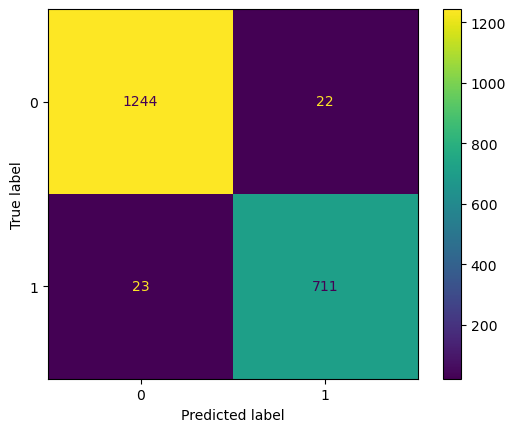

Feature Importances: [0.4213074  0.56250169 0.0009829  0.00112536 0.00144082 0.00126719
 0.00127179 0.00110083 0.00126708 0.00139907 0.00119869 0.00161764
 0.00215438 0.00136517]


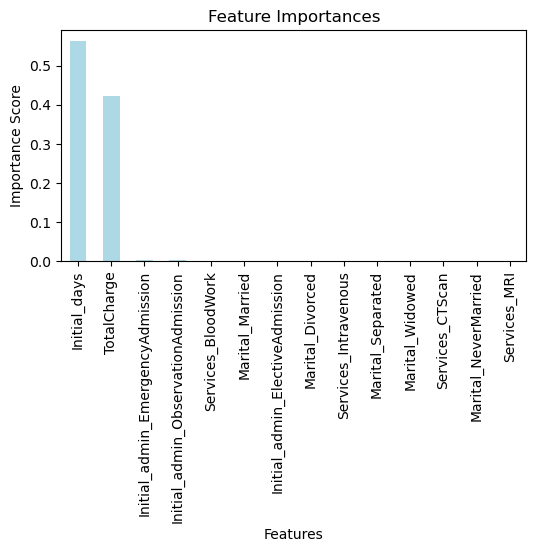

In [16]:
# import necessary modules
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# instantiate the model
rf_classifier = RandomForestClassifier(random_state=42, n_estimators=100)

# fit the model on the training data
rf_classifier.fit(X_train, y_train)

# predict on the test data
y_pred_tests = rf_classifier.predict(X_test)

# model evaluation
accuracy = accuracy_score(y_test, y_pred_tests)
class_report = classification_report(y_test, y_pred_tests)

# printing the evaluation metrics
print(f"Accuracy: {accuracy}\n")
print(f"Classification Report:\n{class_report}\n")

# showing predictions vs actual
print(pd.DataFrame(data={'Predicted': y_pred_tests, 'Actual': y_test}).head(15))

# show F1 Score
from sklearn.metrics import f1_score
print(f"F1 score: ", f1_score(y_test, y_pred_tests, average='weighted'))

# Calculate AUC
auc = roc_auc_score(y_test, y_pred_tests)
print(f'AUC: {auc:.2f}')

# Mean Squared Error, Root mean squared error, and R-squared score calculations
from sklearn.metrics import mean_squared_error, r2_score 
mse = mean_squared_error(y_test,y_pred_tests)
rmse = mse**(1/2)
r_squared = r2_score(y_test, y_pred_tests)

# printing metrics from above
print("Mean squared error: ", mse)
print("Root mean squared error: ", rmse)
print("R-squared score: ", r_squared)

# create and print confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_tests)
plt.show()

# access feature importances
feature_importances = rf_classifier.feature_importances_
print("Feature Importances:", feature_importances)

X = data_std.drop(['ReAdmis'], axis=1)

# creating a pd.Series of feature importances
# sorting features by importance in descending order
features_sorted = pd.Series(feature_importances, index=X.columns).sort_values(ascending=False)

# plotting the feature importances
plt.figure(figsize=(6,3))
features_sorted.plot(kind='bar', color='lightblue')
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.show()

<a id="data-summary"></a>
## E. Data summary and implications

After generating our initial random forest model, we analyzed the accuracy, Area Under the Curve (AUC), and mean squared error. The accuracy score is based on the number of correct predictions, in this case, true positives and true negatives. Our initial model achieved an accuracy of 97.75%.

The Receiver Operating Characteristic (ROC) curve plots the true positive rate against the false positive rate at various threshold settings. The AUC provides a single, aggregate measure of performance across all possible classification thresholds (GfG, 2024). The initial model had an AUC of 0.98, indicating that the model had an almost perfect ability to distinguish correctly between all positive and negative class instances. We used the SelectKBest function from sklearn to include only significant features in our initial model, likely contributing to the reduction of noise in our data.

The mean squared error (MSE) is the sum of the squared differences between the predicted values and the actual values. It determines how well the model estimates the target based on the algorithm’s analysis. The MSE for this model is 0.0225, indicating a 2.25% error rate in terms of false positive predictions. However, this statistic may not be entirely appropriate for our analysis. This is because the MSE function expects real-valued inputs in the range from negative infinity to infinity, whereas binary classification models typically output probabilities in the range of 0 to 1 (Khan, 2021).

<a id="results"></a>
### E2. Results and implications

The initial model chosen has an accuracy score of 0.9775, a precision score of 0.98, and an AUC score of 0.98. The model demonstrates that it can correctly predict non-readmission 98% of the time, while correctly predicting readmission in 97.75% of cases. The mean squared error for this model is 0.0225, indicating just a 2.25% rate of false positives, which means there are fewer errors in predicting outcomes.

This confirms that the model classifies data accurately and is capable of producing reliable true positive results. By using the SelectKBest method, we were able to select only significant features for the model with a p-value less than 0.05. The model can be utilized to assist with predicting patient readmissions using the variables identified in our initial model. The accuracy of the model could be further improved by applying hyperparameter tuning to additional parameters.

<a id="limitation"></a>
### E3. Limitation

One limitation of our study is the adjustment of the RandomForestClassifier parameters. Although the initial model achieved an accuracy score of 97.75%, we did not perform hyperparameter tuning to further refine our parameters. By conducting hyperparameter tuning, we might be able to improve the true positive and true negative ratios. 

Additionally, Random Forests are limited in that they cannot extrapolate, they can only make predictions based on the averages of previously observed labels. This becomes problematic when the training and prediction inputs differ in range. In such scenarios, other algorithms might be more suitable.

<a id="course-of-action"></a>
### E4. Recommended course of action

Analyzing the predictor variables used in this model will enable hospitals to identify which features most significantly impact patient readmittance. The model achieved an accuracy score of 97.75%, however further analysis should be conducted to determine if this reflects an underfit or overfit of the model. Adjusting the RandomForest parameters through hyperparameter tuning may give a more accurate model and expedite predictions. According to the model, patients with higher 'initial_days' and 'TotalCharge' are at greater risk of readmission. Once the analysis of the predictor variables is complete, hospitals can focus their efforts on these factors to reduce the likelihood of patient readmittance.

<a id="video"></a>
## G. Panopto Video
https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=ec8edfba-8647-4af3-a97a-b15d0035711d

<a id="thirdparty"></a>
## H. Third-party Code References

Bernabas. (2023, April 30). Random Forest with Confusion Matrix. Kaggle. https://www.kaggle.com/code/bernabas/random-forest-with-confusion-matrix

GeeksforGeeks. (2022, June 27). How to do train test split using Sklearn in Python. GeeksforGeeks. https://www.geeksforgeeks.org/how-to-do-train-test-split-using-sklearn-in-python/

D209 Task 2. (n.d.). Western Governors University. https://westerngovernorsuniversity.sharepoint.com/:p:/r/sites/DataScienceTeam/_layouts/15/Doc.aspx?sourcedoc=%7B4B73AB47-67CB-4E1F-ABF9-33FAB2B3E26F%7D&file=D209%20Data%20Mining%201%20Task%202%20Cohort.pptx&action=edit&mobileredirect=true


<a id="references"></a>
## I. References

AIML.com. (2023). What are the advantages and disadvantages of Random Forest? 
https://aiml.com/what-are-the-advantages-and-disadvantages-of-random-forest/

D209 Datasets. (n.d.). WGU Performance Assessment. Tasks.wgu.edu. Retrieved from
https://tasks.wgu.edu/student/004659020/course/29780017/task/3784/overview

GfG. (2024, January 25). AUC ROC curve in machine learning. GeeksforGeeks. https://www.geeksforgeeks.org/auc-roc-curve/

H2O.ai. (n.d.). How is random forest used for classification and regression problems? 
https://h2o.ai/wiki/random-forest/

IBM. (n.d.). What is bagging? https://www.ibm.com/topics/bagging

Khan, R. (2021, December 12). Why Using Mean Squared Error(MSE) Cost Function for Binary Classification is a Bad Idea? Medium. https://towardsdatascience.com/why-using-mean-squared-error-mse-cost-function-for-binary-classification-is-a-bad-idea-933089e90df7

Rocca, H. B., Peden, C. J., Soong, J., Holman, P. A., Bogdanovskaya, M., & Barclay, L. (2020). Reasons for readmission after hospital discharge in patients with chronic diseases—Information from an international dataset. *PLOS ONE*, 15(6), e0233457. https://doi.org/10.1371/journal.pone.0233457

Western Governors University. (n.d.). WGU Task 2. https://westerngovernorsuniversity.sharepoint.com/:p:/r/sites/DataScienceTeam/_layouts/15/Doc.aspx?sourcedoc=%7B4B73AB47-67CB-4E1F-ABF9-33FAB2B3E26F%7D&file=D209%20Data%20Mining%201%20Task%202%20Cohort.pptx&action=edit&mobileredirect=true